In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
gold_price = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_price.shape

(2290, 6)

In [ ]:
correlation = gold_price.corr()

In [ ]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


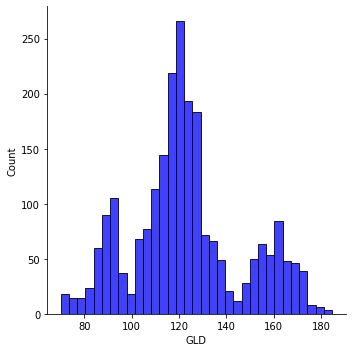

In [ ]:
sns.displot(gold_price['GLD'],color='blue',)

"plt.figure(figsize = (8,8))\nsns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')"

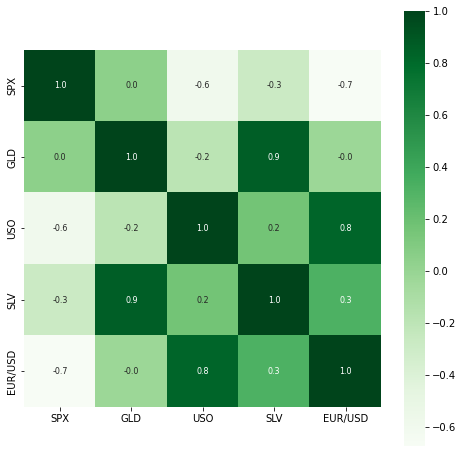

In [ ]:
plt.figure(figsize =(8,8))

sns.heatmap(correlation,cbar=True,square=True,fmt ='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

'''plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')'''

In [ ]:
X = gold_price.drop(['GLD','Date'],axis=1)

Y = gold_price['GLD']

In [ ]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
Regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
Regressor.fit(X_test,Y_test)

RandomForestRegressor()

In [ ]:
X_prediction = Regressor.predict(X_test)

In [ ]:
print(X_prediction)

[167.3925026   83.92650193 111.95270009 126.78459816 120.14890191
 154.02900521 148.78330218 125.45910144 117.69510073 126.07949809
 115.24189817 169.12629702 139.84050142 165.81179939 116.59529894
 119.18819872 140.51979907 169.45419609 159.87379622 166.46629938
 154.48520076 126.7918969  174.82460055 154.27090207 125.13963694
  93.90890142  77.77420057 120.46670108 118.64999862 166.92969996
  88.02110049 124.96263979  91.62320196 114.63439915 120.38209874
 134.14169782 117.3230011  115.25389891 139.22080075 107.13670096
 104.201002    87.44749947 126.3851998  116.14310042 155.54449825
 120.23559885 108.8567025  108.38070166  93.439998   126.88110225
  73.3890007  114.00370053 119.77609968 110.22109936 119.34839927
 121.38050202 160.11169923 159.03470301 146.26480371  85.8544989
  94.09009856  85.96190189  91.22889905 116.53479889 126.24899814
 128.09920149 167.49199764 122.16563917 117.0830025   98.45209925
 163.69820303 144.68460022 131.7250988  121.11400034 124.31919977
 121.085097

In [ ]:
error = metrics.r2_score(X_prediction,Y_test)

print("The error Score is :",error)

The error Score is : 0.9961666463288473


Text(0.5, 1.0, 'Predicted_VS_Actual_Gold_values')

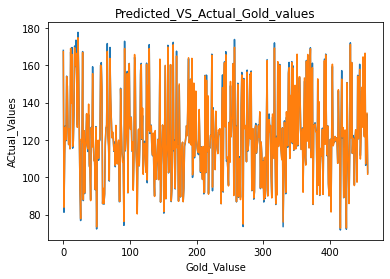

In [ ]:
Y_test = list(Y_test)
plt.plot(Y_test)
plt.plot(X_prediction)
plt.xlabel('Gold_Valuse')
plt.ylabel('ACtual_Values')
plt.title('Predicted_VS_Actual_Gold_values')